In [1]:
# prompt: Load sklearn's wine dataset.

from sklearn import datasets
X, y = datasets.load_wine(return_X_y=True, as_frame=True)


In [2]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [3]:
# prompt: Split the dataset into train and test set with 70:30 ratio with random_state 1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)


In [9]:
# prompt: Train using DecisionTreeClassifier with random_state = 1

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [11]:
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.9444444444444444

In [12]:
clf.get_depth()

6

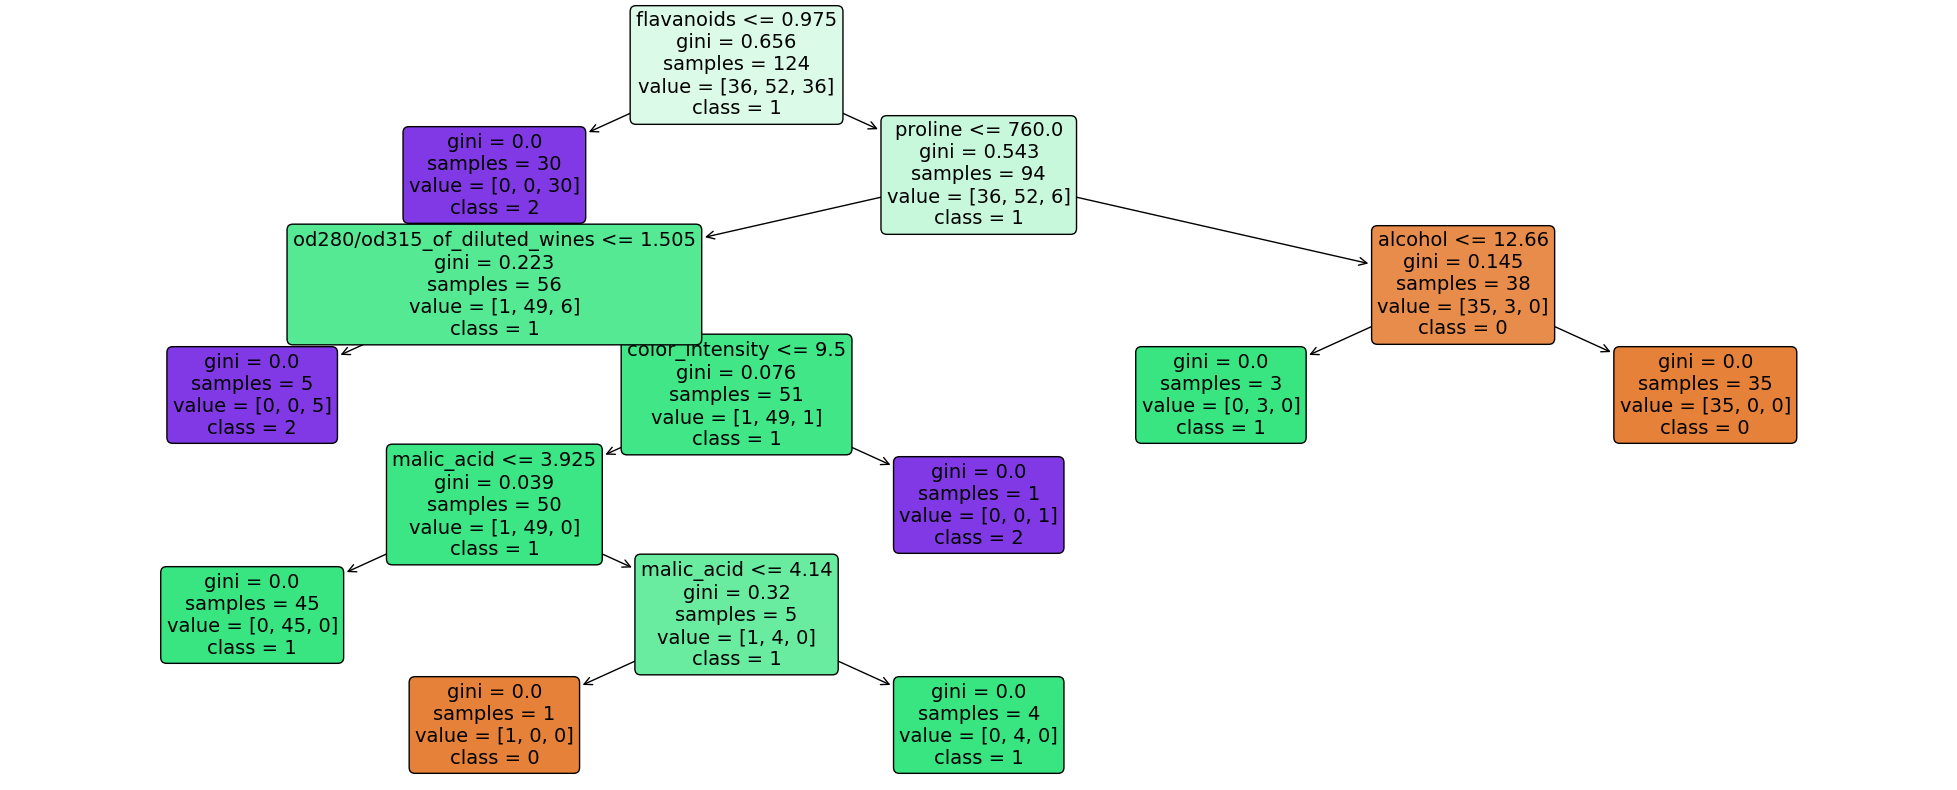

In [13]:
# prompt: classification tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(clf,
              feature_names=X.columns,
              class_names=['0','1', '2'],
              filled=True,
              rounded=True,
              fontsize=14)


In [14]:
# prompt: -- Use criterion as 'entropy'
# -- Use splitter as 'random'; default is 'best'
# -- maximum depth = 3
# -- minimum samples required to split = 4
# -- Use minimum impurity decrease as 0.1

clf = DecisionTreeClassifier(criterion='entropy',
                             splitter='random',
                             max_depth=3,
                             min_samples_split=4,
                             min_impurity_decrease=0.1,
                             random_state=1)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3,
                       min_impurity_decrease=0.1, min_samples_split=4,
                       random_state=1, splitter='random')

In [15]:
clf.score(X_train, y_train)

0.8145161290322581

In [16]:
clf.score(X_test, y_test)

0.7777777777777778

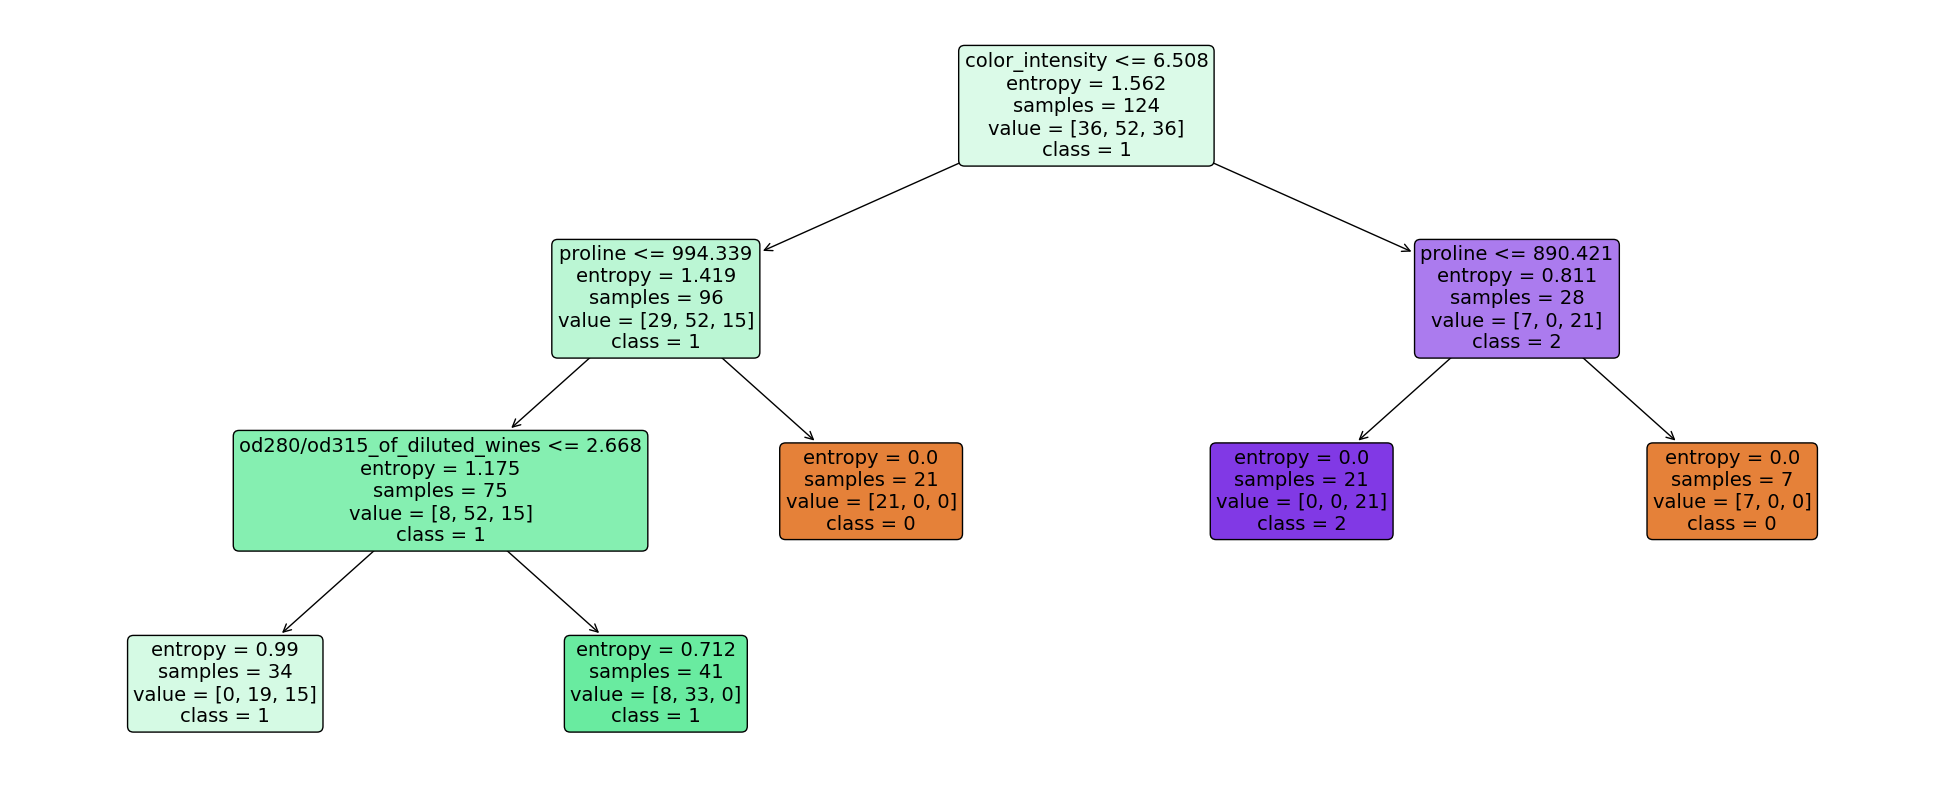

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(clf,
              feature_names=X.columns,
              class_names=['0','1', '2'],
              filled=True,
              rounded=True,
              fontsize=14)


In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)

In [5]:
# prompt: Hyperparameter tuning to be done over the following parameters:
# -- Use criterion as 'entropy' or 'gini'
# -- Use splitter as 'random' or 'best'
# -- Use minimum number of samples per leaf as [2,4,6,8,10]
# -- Use maximum depth as [3,4,5,6]
# -- Use cross validation = 4
# -- Train the 'model'

from sklearn.model_selection import GridSearchCV

param_dist = {'criterion': ['entropy', 'gini'],
              'splitter': ['random', 'best'],
              'min_samples_leaf': [2,4,6,8,10],
              'max_depth': [3,4,5,6]
             }

cv_model = GridSearchCV(clf, param_grid=param_dist, cv=4, n_jobs=-1)

cv_model.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']})

In [6]:
# prompt: Enter the value of the 'score' on testing set.

cv_model.score(X_test, y_test)


0.9074074074074074

In [7]:
cv_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [8]:
# prompt: Load sklearn's Diabetes dataset.

from sklearn import datasets

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [9]:
# prompt: Split the dataset into train and test set with 70:30 ratio with random_state = 1

diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.3, random_state=1)


In [10]:
# prompt: Use DecisionTreeRegressor with random_state = 1

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(diabetes_X_train, diabetes_y_train)

DecisionTreeRegressor(random_state=1)

In [11]:
# prompt: -- Use criterion as 'squared_error'
# -- Use splitter as 'random'
# -- Use max_leaf_nodes= 10

regressor = DecisionTreeRegressor(criterion='squared_error', splitter='random', max_leaf_nodes=10, random_state=1)
regressor.fit(diabetes_X_train, diabetes_y_train)


DecisionTreeRegressor(max_leaf_nodes=10, random_state=1, splitter='random')

In [13]:
# prompt: - Train the 'model' and compute the 'score' on training data and test data

print(regressor.score(diabetes_X_train, diabetes_y_train))
print(regressor.score(diabetes_X_test, diabetes_y_test))


0.5032060624566737
0.218771375137222


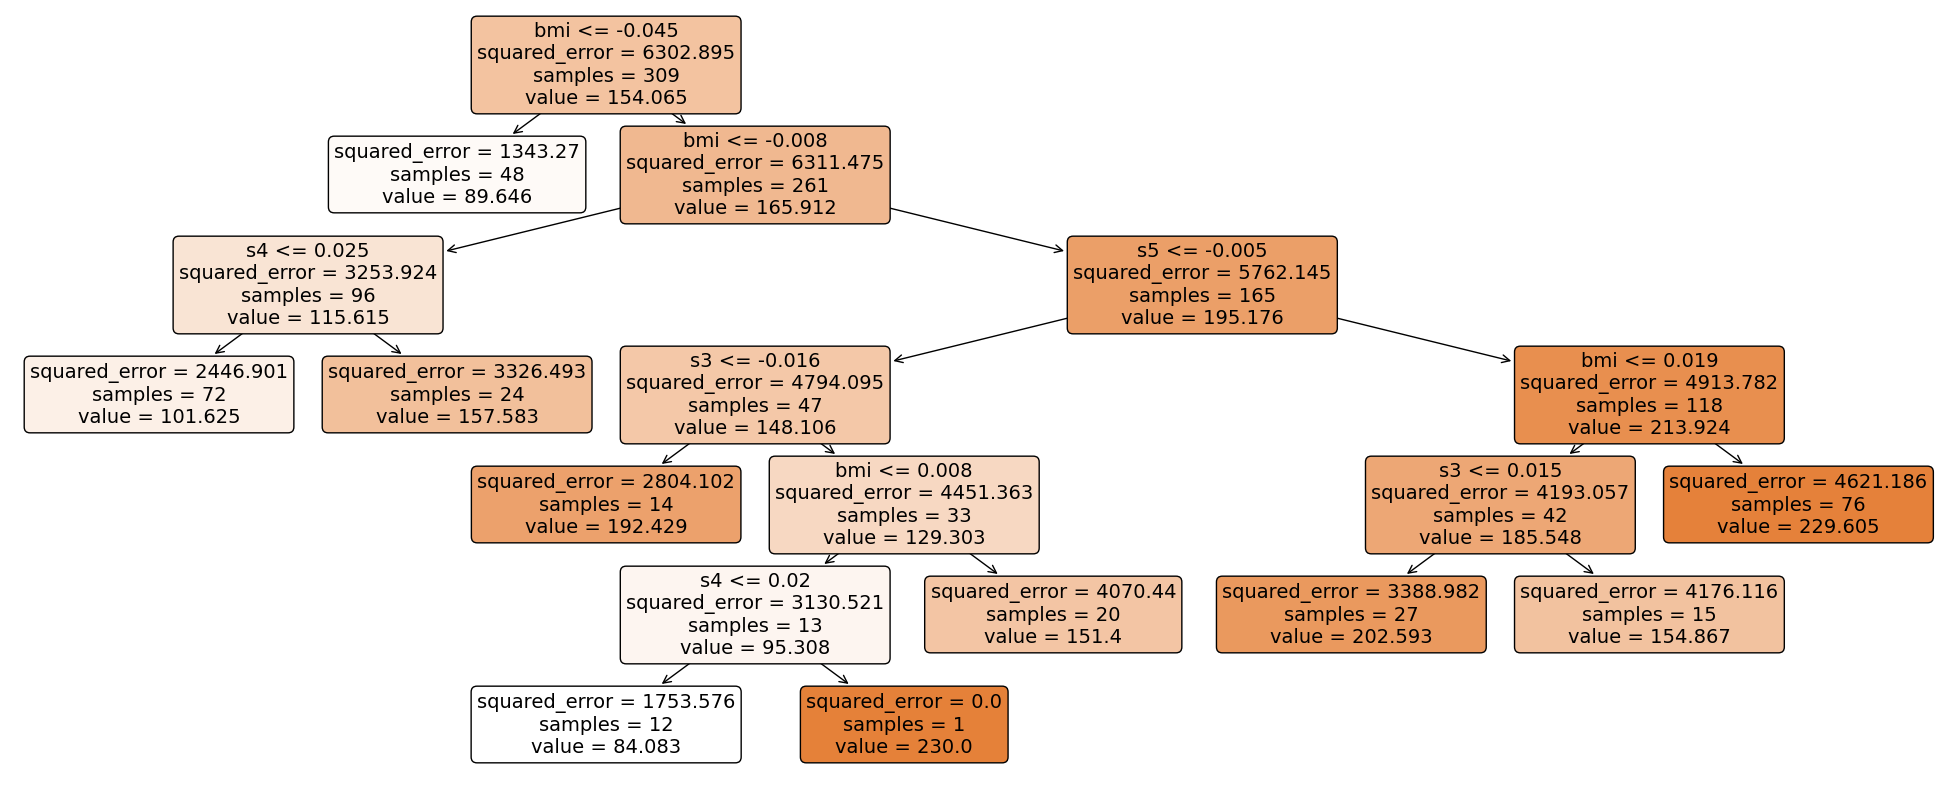

In [15]:
# prompt: plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
a = plot_tree(regressor,
              feature_names=diabetes_X.columns,
              filled=True,
              rounded=True,
              fontsize=14)


In [16]:
# prompt: Use DecisionTreeRegressor with
# max_depth = 4
#  and
# random_state = 1

regressor = DecisionTreeRegressor(max_depth = 4, random_state = 1)


In [17]:
# prompt: Perform Hyperparameter tuning over the following parameters:
# -- Use criterion as ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
# -- Use splitter as 'random' or 'best'
# -- Use max number of features as [4,5,6,'sqrt', 'log2'],
# -- Use cost complexity pruning parameter as [0.001,0.01,0.02,0.05]
# -- Use cross validation = 4

param_dist = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter': ['random', 'best'],
              'max_features': [4,5,6,'sqrt', 'log2'],
              'ccp_alpha': [0.001,0.01,0.02,0.05]
             }

cv_model = GridSearchCV(regressor, param_grid=param_dist, cv=4, n_jobs=-1)

cv_model.fit(diabetes_X_train, diabetes_y_train)

print(cv_model.best_params_)
print(cv_model.score(diabetes_X_train, diabetes_y_train))
print(cv_model.score(diabetes_X_test, diabetes_y_test))

{'ccp_alpha': 0.001, 'criterion': 'squared_error', 'max_features': 5, 'splitter': 'random'}
0.48083271197772626
0.2276927113007854
